### imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data

In [2]:
train = pd.read_csv('data/train.csv')

X_train = train.drop(columns='Survived')
y_train = pd.DataFrame(train['Survived'])

In [3]:
print(f'X_train has a shape of {X_train.shape}\ny_train has a shape of {y_train.shape}')

X_train has a shape of (891, 11)
y_train has a shape of (891, 1)


# Preprocessing

## Duplicates

In [4]:
print(f'There are {X_train.duplicated().sum()} duplicates in this data set.')

There are 0 duplicates in this data set.


## Null values

In [5]:
X_train.isnull().sum()

print(f'There are {X_train.isnull().sum().Age} missing values in the "Age" column.\n'
'---------------------------------------------\n'
f'There are {X_train.isnull().sum().Cabin} missing values in the "Cabin column".\n'
'---------------------------------------------\n'
f'There are {X_train.isnull().sum().Embarked} missing values in the "Embarked" column.')

There are 177 missing values in the "Age" column.
---------------------------------------------
There are 687 missing values in the "Cabin column".
---------------------------------------------
There are 2 missing values in the "Embarked" column.


### Drop 'Cabin' column

In [6]:
print(f'There are {X_train.Cabin.value_counts().sum()} different values for the "Cabin" class. It can be discarded')
X_train = X_train.drop(columns='Cabin')
X_train.head()

There are 204 different values for the "Cabin" class. It can be discarded


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### Filling "Embarked" column with mode

In [7]:
most_common_embarked = X_train['Embarked'].mode()[0]
X_train['Embarked'].fillna(most_common_embarked, inplace=True)
print(f'There are {X_train.isnull().sum().Embarked} missing values in the "Embarked" column.')

There are 0 missing values in the "Embarked" column.


### Age column

#### Separate by embarkation point

In [8]:
c_df = X_train[X_train['Embarked'] == 'C']
s_df = X_train[X_train['Embarked'] == 'S']
q_df = X_train[X_train['Embarked'] == 'Q']

display(c_df.head(3), s_df.head(3), q_df.head(3))

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C
19,20,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250,S
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.100,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
16,17,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,Q
22,23,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,Q


In [59]:
print(
    f'There are {c_df.Age.isnull().sum()} missing values in the "Age" column in embarkations in Cherbourg.\n'
    f'This is from a total of {c_df.shape[0]} passengers who embarked here: {round((c_df.Age.isnull().sum() / c_df.shape[0]) * 100, 2)}%\n'
    '---------------------------------------------\n'
    f'There are {s_df.Age.isnull().sum()} missing values in the "Age" column in embarkations in Southampton.\n'
    f'This is from a total of {s_df.shape[0]} passengers who embarked here: {round((s_df.Age.isnull().sum() / s_df.shape[0]) * 100, 2)}%\n'
    '---------------------------------------------\n'
    f'There are {q_df.Age.isnull().sum()} missing values in the "Age" column in embarkations in Queenstown.\n'
    f'This is from a total of {q_df.shape[0]} passengers who embarked here: {round((q_df.Age.isnull().sum() / q_df.shape[0]) * 100, 2)}%\n'
)

There are 38 missing values in the "Age" column in embarkations in Cherbourg.
This is from a total of 168 passengers who embarked here: 22.62%
---------------------------------------------
There are 90 missing values in the "Age" column in embarkations in Southampton.
This is from a total of 646 passengers who embarked here: 13.93%
---------------------------------------------
There are 49 missing values in the "Age" column in embarkations in Queenstown.
This is from a total of 77 passengers who embarked here: 63.64%



##### Ages Cherbourg

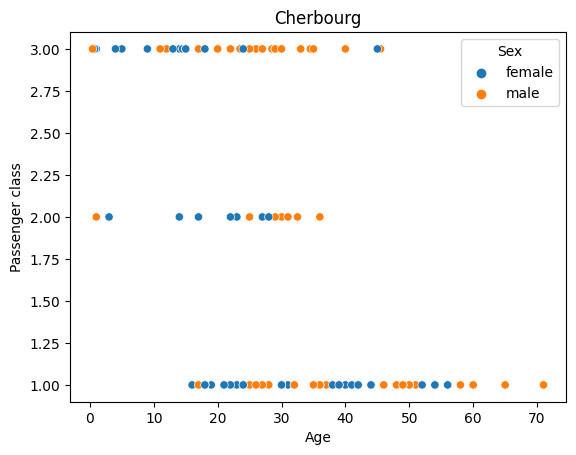

In [18]:
sns.scatterplot(x=c_df['Age'], y=c_df['Pclass'], hue=c_df['Sex'])
plt.title('Cherbourg')
plt.xlabel('Age')
plt.ylabel('Passenger class');

In [28]:
probs_c = c_df.groupby(['Sex', 'Pclass'])['Age'].agg(['mean', 'median', lambda x: x.mode().iloc[0]]).reset_index()

probs_c.rename(columns={'<lambda_0>': 'mode'}, inplace=True)

,Sex,Pclass,mean,median,mode
0,female,1,36.052632,37.00,24.00
1,female,2,19.142857,22.00,3.00
2,female,3,14.062500,14.25,0.75
3,male,1,40.111111,36.50,49.00
4,male,2,25.937500,29.50,1.00
5,male,3,25.016800,26.00,20.00


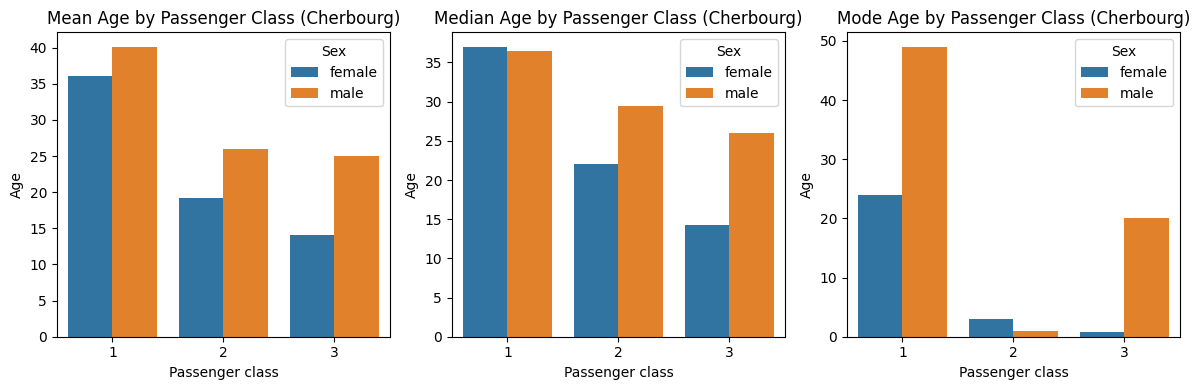

In [37]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

sns.barplot(x=probs_c['Pclass'], y=probs_c['mean'], hue=probs_c['Sex'], data=grouped_stats, ax=axes[0], ci=None)
axes[0].set_title('Mean Age by Passenger Class (Cherbourg)')
axes[0].set_xlabel('Passenger class')
axes[0].set_ylabel('Age')
axes[0].legend(title='Sex')

sns.barplot(x=probs_c['Pclass'], y=probs_c['median'], hue=probs_c['Sex'], data=grouped_stats, ax=axes[1], ci=None)
axes[1].set_title('Median Age by Passenger Class (Cherbourg)')
axes[1].set_xlabel('Passenger class')
axes[1].set_ylabel('Age')
axes[1].legend(title='Sex')

sns.barplot(x=probs_c['Pclass'], y=probs_c['mode'], hue=probs_c['Sex'], data=grouped_stats, ax=axes[2], ci=None)
axes[2].set_title('Mode Age by Passenger Class (Cherbourg)')
axes[2].set_xlabel('Passenger class')
axes[2].set_ylabel('Age')
axes[2].legend(title='Sex')

plt.tight_layout()
plt.show()

##### Ages Southampton

,Sex,Pclass,mean,median,mode
0,female,1,36.052632,37.00,24.00
1,female,2,19.142857,22.00,3.00
2,female,3,14.062500,14.25,0.75
3,male,1,40.111111,36.50,49.00
4,male,2,25.937500,29.50,1.00
5,male,3,25.016800,26.00,20.00


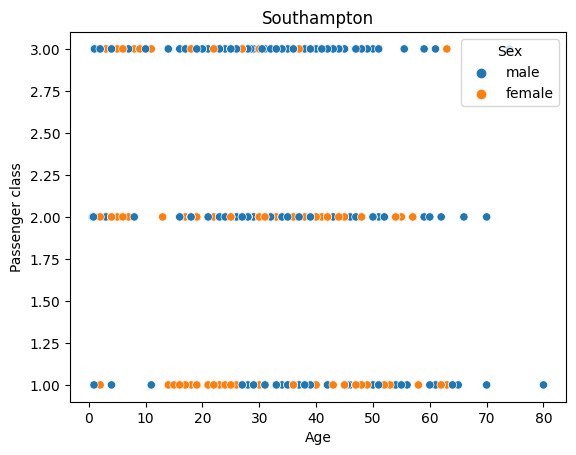

In [44]:
sns.scatterplot(x=s_df['Age'], y=s_df['Pclass'], hue=s_df['Sex'])
plt.title('Southampton')
plt.xlabel('Age')
plt.ylabel('Passenger class');

probs_s = c_df.groupby(['Sex', 'Pclass'])['Age'].agg(['mean', 'median', lambda x: x.mode().iloc[0]]).reset_index()

probs_s.rename(columns={'<lambda_0>': 'mode'}, inplace=True)

display(probs_s)

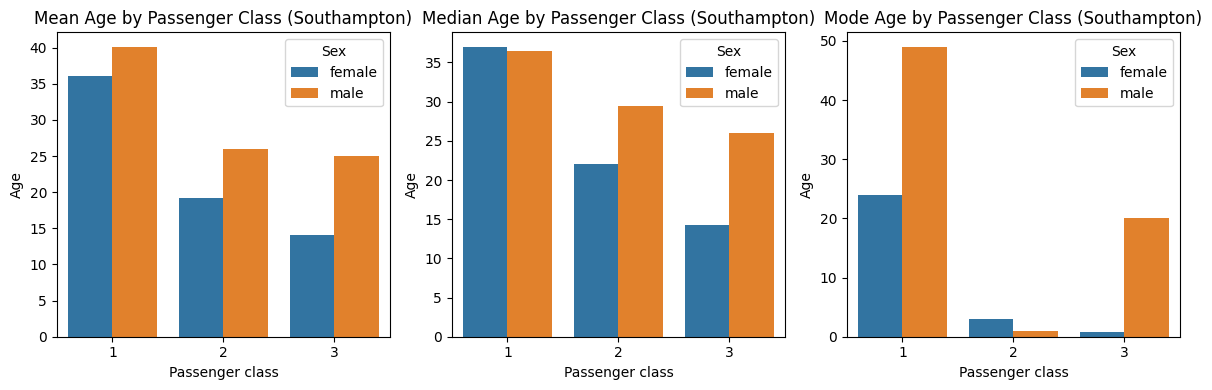

In [43]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

sns.barplot(x=probs_s['Pclass'], y=probs_s['mean'], hue=probs_s['Sex'], data=grouped_stats, ax=axes[0], ci=None)
axes[0].set_title('Mean Age by Passenger Class (Southampton)')
axes[0].set_xlabel('Passenger class')
axes[0].set_ylabel('Age')
axes[0].legend(title='Sex')

sns.barplot(x=probs_s['Pclass'], y=probs_s['median'], hue=probs_s['Sex'], data=grouped_stats, ax=axes[1], ci=None)
axes[1].set_title('Median Age by Passenger Class (Southampton)')
axes[1].set_xlabel('Passenger class')
axes[1].set_ylabel('Age')
axes[1].legend(title='Sex')

sns.barplot(x=probs_s['Pclass'], y=probs_s['mode'], hue=probs_s['Sex'], data=grouped_stats, ax=axes[2], ci=None)
axes[2].set_title('Mode Age by Passenger Class (Southampton)')
axes[2].set_xlabel('Passenger class')
axes[2].set_ylabel('Age')
axes[2].legend(title='Sex')

plt.tight_layout()
plt.show()

##### Ages Queenstown

,Sex,Pclass,mean,median,mode
0,female,1,33.000000,33.0,33.0
1,female,2,30.000000,30.0,30.0
2,female,3,22.850000,20.0,16.0
3,male,1,44.000000,44.0,44.0
4,male,2,57.000000,57.0,57.0
5,male,3,28.142857,27.0,2.0


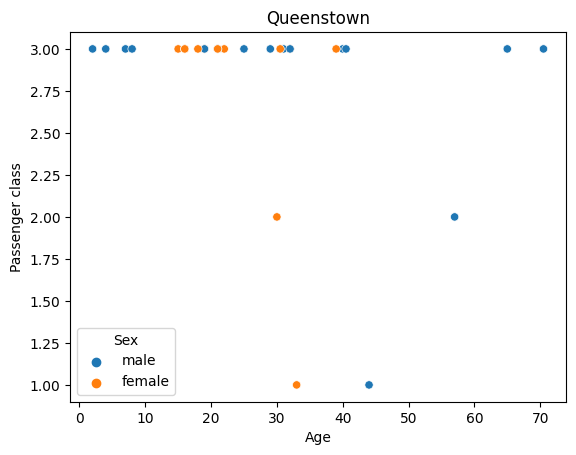

In [46]:
sns.scatterplot(x=q_df['Age'], y=q_df['Pclass'], hue=q_df['Sex'])
plt.title('Queenstown')
plt.xlabel('Age')
plt.ylabel('Passenger class');

probs_q = q_df.groupby(['Sex', 'Pclass'])['Age'].agg(['mean', 'median', lambda x: x.mode().iloc[0]]).reset_index()

probs_q.rename(columns={'<lambda_0>': 'mode'}, inplace=True)

display(probs_q)

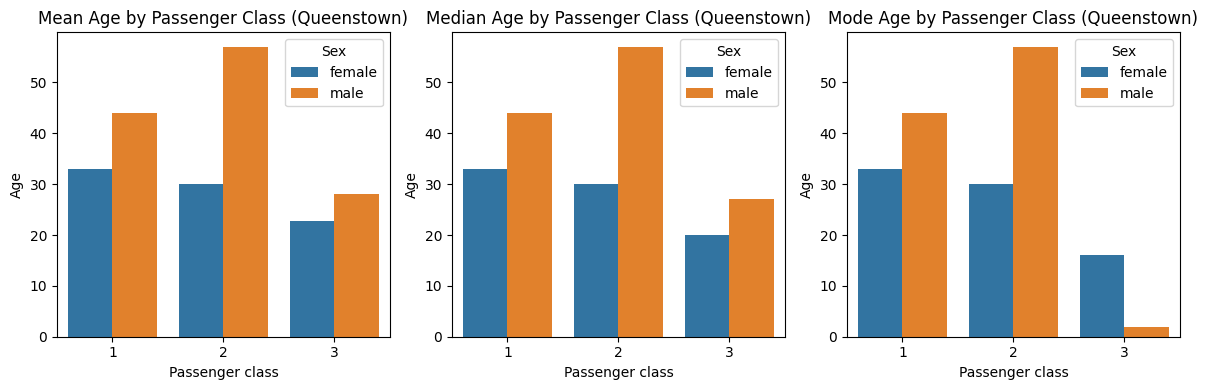

In [47]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

sns.barplot(x=probs_q['Pclass'], y=probs_q['mean'], hue=probs_q['Sex'], data=grouped_stats, ax=axes[0], ci=None)
axes[0].set_title('Mean Age by Passenger Class (Queenstown)')
axes[0].set_xlabel('Passenger class')
axes[0].set_ylabel('Age')
axes[0].legend(title='Sex')

sns.barplot(x=probs_q['Pclass'], y=probs_q['median'], hue=probs_q['Sex'], data=grouped_stats, ax=axes[1], ci=None)
axes[1].set_title('Median Age by Passenger Class (Queenstown)')
axes[1].set_xlabel('Passenger class')
axes[1].set_ylabel('Age')
axes[1].legend(title='Sex')

sns.barplot(x=probs_q['Pclass'], y=probs_q['mode'], hue=probs_q['Sex'], data=grouped_stats, ax=axes[2], ci=None)
axes[2].set_title('Mode Age by Passenger Class (Queenstown)')
axes[2].set_xlabel('Passenger class')
axes[2].set_ylabel('Age')
axes[2].legend(title='Sex')

plt.tight_layout()
plt.show()

#### Fill in missing ages by Embarked, Sex and Pclass

In [80]:
median_age_by_features = X_train.groupby(['Embarked', 'Sex', 'Pclass'])['Age'].median()
median_age_by_features

Embarked  Sex     Pclass
C         female  1         37.00
                  2         22.00
                  3         14.25
          male    1         36.50
                  2         29.50
                  3         26.00
Q         female  1         33.00
                  2         30.00
                  3         20.00
          male    1         44.00
                  2         57.00
                  3         27.00
S         female  1         34.00
                  2         29.00
                  3         23.00
          male    1         42.00
                  2         30.00
                  3         25.00
Name: Age, dtype: float64

In [81]:
def fill_missing_age(row):
    return median_age_by_features.loc[row['Embarked'], row['Sex'], row['Pclass']]

missing_age_mask = X_train['Age'].isnull()
X_train.loc[missing_age_mask, 'Age'] = X_train[missing_age_mask].apply(fill_missing_age, axis=1)

X_train.Age.isnull().sum()

0

### Checking for outliers

In [85]:
X_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


/root/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


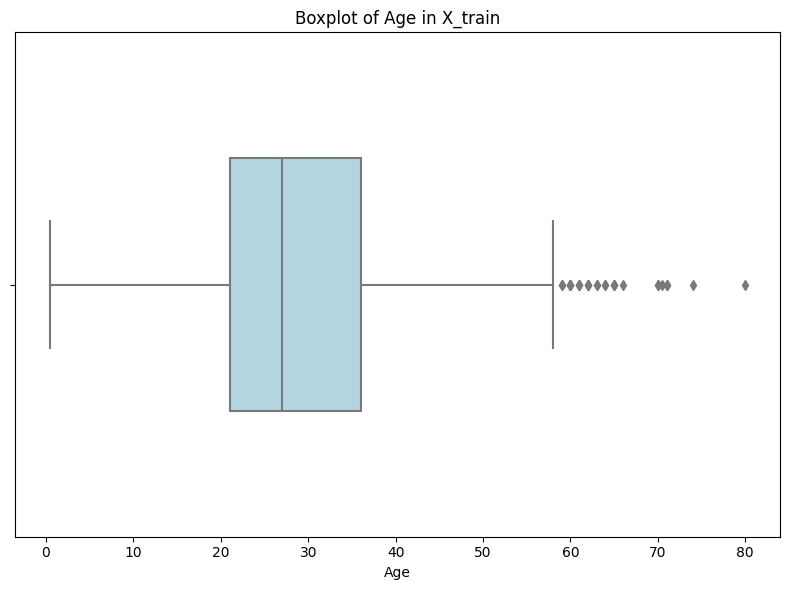

In [88]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=X_train['Age'], orient='', width=0.5, color='lightblue')

# Add title and labels
plt.title('Boxplot of Age in X_train')
plt.xlabel('Age')
plt.ylabel('')

plt.tight_layout()
plt.show()